<a href="https://colab.research.google.com/github/Ezra-A-Cohen/inspirit-AI/blob/main/04_NN_ConscientiousCars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


We work for CC: ConscientiousCars, where we help self-driving vehicles be more conscientious of their surroundings. Our cars have been very good at recognizing and avoiding humans. They haven't, however, been capable of recognizing dogs. Since dogs are man's best friend and will always be where we humans are, we want our cars to know if a dog is on the road in front of them and avoid the dog!

The first step to avoiding these cute puppers is **knowing if a pupper is in front of the car**. So today we will **build a detector that can tell when our car sees a dog or not**!

In this notebook, you'll:
- Explore the cars vs. roads dataset
- Train a simple K-neighbors classifier for computer vision
- Train neural nets to tell dogs from roads
- Improve your model with convolutional neural networks!



In [1]:
pip install scikeras

In [28]:
#@title Run this to load some packages and data! { display-mode: "form" }
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import numpy as np
from sklearn.metrics import accuracy_score
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
import scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def load_data():
  # Run this cell to download our data into a file called 'cifar_data'
  import gdown
  # gdown.download('https://drive.google.com/uc?id=1-BjeqccJdLiBA6PnNinmXSQ6w5BluLem','cifar_data','True'); # dogs v road;
  !wget -O cifar_data https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads

  # now load the data from our cloud computer
  import pickle
  data_dict = pickle.load(open( "cifar_data", "rb" ));
  
  data   = data_dict['data']
  labels = data_dict['labels']
  
  return data, labels

def plot_one_image(data, labels, img_idx):
  from google.colab.patches import cv2_imshow
  import cv2
  import matplotlib.pyplot as plt
  my_img   = data[img_idx, :].squeeze().reshape([32,32,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  fig, ax = plt.subplots(1,1)

  img = ax.imshow(my_img, extent=[-1,1,-1,1])

  x_label_list = [0, 8, 16, 24, 32]
  y_label_list = [0, 8, 16, 24, 32]

  ax.set_xticks([-1, -0.5, 0, 0.5, 1])
  ax.set_yticks([-1, -0.5, 0, 0.5, 1])

  ax.set_xticklabels(x_label_list)
  ax.set_yticklabels(y_label_list)

  fig.show(img)
#np.array(list(map(lambda x: 1 if x == "dog" else 0, y_train)), dtype="float32")
def categorical_to_numpy(labels_in):
  return np.array(list(map(lambda x: np.array([1, 0]) if x == "dog" else np.array([0, 1]), labels_in)), dtype="float32")
  
def CNNClassifier(num_epochs=30):
  def create_model():
    model = Sequential()
    if x==0:
      model.add(tf.keras.layers.Input(shape=(3072)))
      model.add(Reshape((32, 32, 3)))
      model.add(Conv2D(32, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(32, (3, 3)))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))

      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(64, (3, 3)))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))

      model.add(Flatten())
      model.add(Dense(512))
      model.add(Activation('relu'))
      model.add(Dropout(0.5))
      model.add(Dense(2))
      model.add(Activation('softmax'))
    else:
      model.add(tf.keras.layers.Input(shape=(6144)))
      model.add(Reshape((64, 32, 3)))
      model.add(Conv2D(64, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(64, (3, 3)))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))

      model.add(Conv2D(128, (3, 3), padding='same'))
      model.add(Activation('relu'))
      model.add(Conv2D(128, (3, 3)))
      model.add(Activation('relu'))
      model.add(MaxPooling2D(pool_size=(2, 2)))
      model.add(Dropout(0.25))

      model.add(Flatten())
      model.add(Dense(512))
      model.add(Activation('relu'))
      model.add(Dropout(0.5))
      model.add(Dense(2))
      model.add(Activation('softmax'))

    # initiate RMSprop optimizer
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)


def plot_acc(history, ax = None, xlabel = 'Epoch #'):
    history = history.history
    history.update({'epoch':list(range(len(history['val_accuracy'])))})
    history = pd.DataFrame.from_dict(history)

    best_epoch = history.sort_values(by = 'val_accuracy', ascending = False).iloc[0]['epoch']

    if not ax:
      f, ax = plt.subplots(1,1)
    sns.lineplot(x = 'epoch', y = 'val_accuracy', data = history, label = 'Validation', ax = ax)
    sns.lineplot(x = 'epoch', y = 'accuracy', data = history, label = 'Training', ax = ax)
    ax.axhline(0.5, linestyle = '--',color='red', label = 'Chance')
    ax.axvline(x = best_epoch, linestyle = '--', color = 'green', label = 'Best Epoch')  
    ax.legend(loc = 1)    
    ax.set_ylim([0.4, 1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel('Accuracy (Fraction)')
    
    plt.show()

# Understanding our data

Our cars are very attentive and always have their eyes on the road.

Every second, they're streaming in data about the street, including video.

From this video data, we want our car to tell: is there 'road' or 'dog' in front of it?

Lucky for us, we have a dataset of dog and road images already prepared! Let's start by reading that *labeled* data in. 


In [3]:
# load our data 
data, labels = load_data()

--2022-02-06 04:43:30--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%201%20-%205/Session%204%20_%205%20-%20Neural%20Networks%20_%20CNN/dogs_v_roads
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3689015 (3.5M) [application/octet-stream]
Saving to: ‘cifar_data’

cifar_data          100%[===================>]   3.52M  --.-KB/s    in 0.03s   

2022-02-06 04:43:30 (134 MB/s) - ‘cifar_data’ saved [3689015/3689015]



Let's look at an image of a dog!

Try changing the number below. What does it do?



label: dog


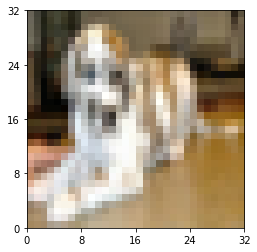

In [4]:
plot_one_image(data, labels, 95) #change this number

**Discuss:** Why might we be using such blurry images?

Next, let's try a road image. Again, try changing the number:

label: road


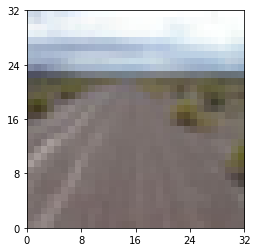

In [5]:
plot_one_image(data, labels, 777) #change this number

How many images do we have?

In [6]:
print (len(data))

print(Counter(labels))


1200
Counter({'dog': 600, 'road': 600})


The dataset is organized such 600 images are pictures of dogs and the last 600 images are pictures of roads.

#### Optional Exercise: Examining More Images

**Look at a few more images of both classes.** 

Try using a `for` loop to look at 5 images!

label: dog
label: dog
label: dog
label: dog
label: dog
label: road
label: road
label: road
label: road
label: road


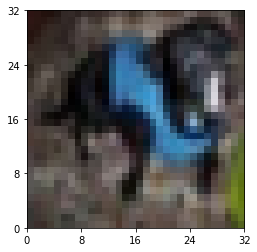

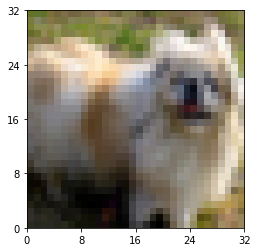

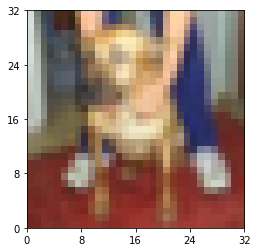

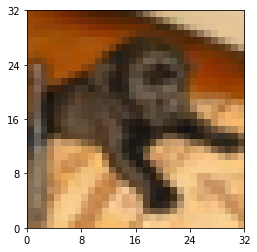

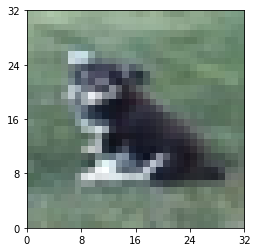

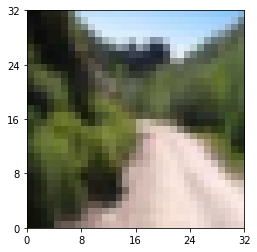

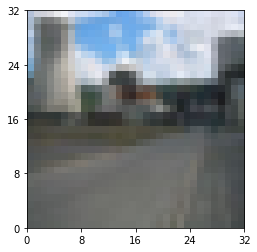

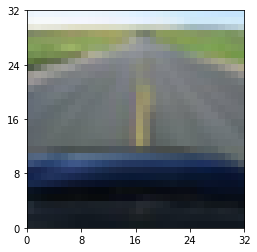

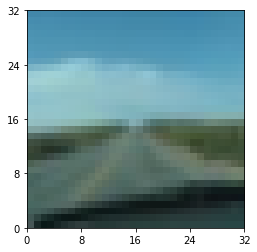

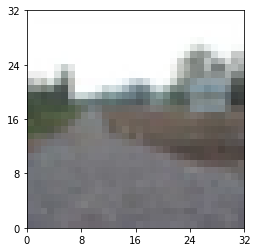

In [7]:
for i in range(0, 5):
  plot_one_image(data, labels, i)

for i in range(700, 705):
  plot_one_image(data, labels, i)

##Understanding our Data Representation

In an image each pixel is denoted by 3 numbers that represent the intensity value of that pixel (0 - 255) for each color channel (R, G, and B). Below we 
see a list of numbers for each image that represent the intensity values. 


In [8]:
print('One image looks like: ')
print(data[0])
print("Length of list: ", len(data[0]))

One image looks like: 
[45 20 19 ... 83 99 31]
Length of list:  3072


**Discuss:** What does each number mean? Can you explain the length of the list?

**Exercise:**
Fill in the right values for the image width, image height, and number of color channels to calculate the right number of pixels.

In [9]:
img_height = 109 #Change this
img_width = 77 #Change this
color_channels = 68 #Change this

print ("Each image is", img_height, 'x', img_width, 'pixels.')
print ("Each pixel has", color_channels, "channels for red, green, blue.")
print ("This gives a total of", img_height * img_width * color_channels, "intensity values per image.")
print ("Should be", len(data[0]))

Each image is 109 x 77 pixels.
Each pixel has 68 channels for red, green, blue.
This gives a total of 570724 intensity values per image.
Should be 3072


We use these values as **inputs** to predict an **output** label: 'dog' or 'road'!

Here's what our entire dataset looks like:

In [10]:
print ('Data shape:', data.shape)
print ('Data:', data)

Data shape: (1200, 3072)
Data: [[ 45  20  19 ...  83  99  31]
 [101 114  35 ... 155 134  91]
 [213 221 221 ... 139  58  47]
 ...
 [126 174 202 ... 124 128 129]
 [191 232 240 ...  74  93  81]
 [237 248 254 ...  45  56  10]]



# A simple machine learner




We want to create a machine learning *model* that can tell us whether a new image is either a `dog` or a `road`. 

We will give our *model* a *training manual* of data and labels that it will study or train on. 

We then check how well our model is doing on a *test*, where it is given data and told to predict their labels. 



## Splitting our data


Let's first build our training manual and test from our data set. Below, we select randomly 20% of the data for the test, and 80% for the train. 

**Discuss:** Why do we need both testing and training data?



In [11]:
# Preparing data and create training and test inputs and labels
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.2)

## Creating our model

Now we will build and train a simple model. We will use the `KNeighborsClassifier` and train our model with `fit`, giving it the training inputs and labels. 

**Playground**: Explore [this demo](http://vision.stanford.edu/teaching/cs231n-demos/knn/) to understand what the KNN model is doing! 

**Exercise:** Please train the model below.

In [12]:
# Defining our classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Training our model 
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Testing how our model did

Finally, we check  how our model did by giving it a *test*. The accuracy score tells us what percentage of test data it classified correctly. 100% means that all the images were classified correctly.

**Exercise:** Please fill in the predictions on the test set.

In [13]:
# Predict what the classes are based on the testing data
predictions = knn.predict(X_test)

Now, let's calculate the accuracy!

In [14]:
# Print the score on the testing data
print("KNN Testing Set Accuracy:")
print(accuracy_score(y_test, predictions)*100)

KNN Testing Set Accuracy:
85.0


## Predicting on images

We can use our trained model to predict whether our car is seeing a `dog` or `road`. Let's try this out - experiment with different images!


label: road
prediction: road


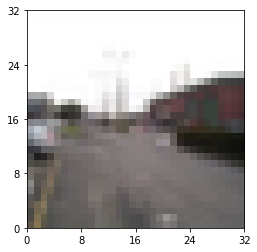

In [15]:
# Specify which image you want to show
image_id = 220 #Change this!

# Visualize the image
plot_one_image(X_test, y_test, image_id)

# Use the model to predict what this might be and print it
print('prediction:', knn.predict([X_test[image_id]])[0])

###Exercise: Building a KNN ✍️


Build your own KNN model where you change the number of neighbors. Try to see how high you can make the accuracy go!! We want our pets to be safe, after all. 

In [16]:
# Defining our classifier
knn = KNeighborsClassifier(n_neighbors=13)

# Training our model with its trianing input data and labels
knn.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = knn.predict(X_test)

# Print the score on the testing data
print("KNN Testing Set Accuracy:")
print(accuracy_score(y_test, predictions)*100)

KNN Testing Set Accuracy:
86.66666666666667


### (Optional) exercise: Experimenting with the number of neighbors

Use a **for loop** to try out several different values of **k**, and see how high your accuracy can get. 

In [17]:
# Defining our classifier
for i in range(10):
  knn = KNeighborsClassifier(n_neighbors=int(i+1))

  # Training our model with its trianing input data and labels
  knn.fit(X_train, y_train)
  
  # predictions for test
  predictions = knn.predict(X_test)

  # Print the score on the testing data
  print("KNN Testing Set Accuracy for %d neighbors:"%i)
  print(accuracy_score(y_test, predictions)*100)

KNN Testing Set Accuracy for 0 neighbors:
83.33333333333334
KNN Testing Set Accuracy for 1 neighbors:
91.66666666666666
KNN Testing Set Accuracy for 2 neighbors:
88.33333333333333
KNN Testing Set Accuracy for 3 neighbors:
90.41666666666667
KNN Testing Set Accuracy for 4 neighbors:
85.0
KNN Testing Set Accuracy for 5 neighbors:
86.66666666666667
KNN Testing Set Accuracy for 6 neighbors:
84.16666666666667
KNN Testing Set Accuracy for 7 neighbors:
87.91666666666667
KNN Testing Set Accuracy for 8 neighbors:
86.66666666666667
KNN Testing Set Accuracy for 9 neighbors:
87.08333333333333


**Discuss:** What are the advantages and disadvantages of using a bigger vs. smaller **k**?

#Neural Networks
Now, let's create some new models using neural networks!

You can play around with [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.62283&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&learningRate_hide=true&batchSize_hide=true&stepButton_hide=true&activation_hide=true) to get a feel for how neural nets work.

To build a simple neural network, we use `MLPClassifier` from scikit-learn. We will play with the **number of neurons** and the **number of hidden layers** to adjust the complexity of our model, just like we did in Playground!

**Example 1:**
Here's how we create a neural network with 1 hidden layer of 3 neurons.

`nnet = MLPClassifier(hidden_layer_sizes=(3)) `

**Example 2:**

Here's how we create a neural network with 2 hidden layers: one of 3 neurons and one of 4 neurons.

`nnet = MLPClassifier(hidden_layer_sizes=(3, 4)) `

In [18]:
# Create and train our multi layer perceptron model
nnet = MLPClassifier(hidden_layer_sizes=(3, 4), max_iter= 10000)  ## How many hidden layers? How many neurons does this have?
nnet.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = nnet.predict(X_test)

# Print the score on the testing data
print("MLP Testing Set Score:")
print(accuracy_score(y_test, predictions)*100)

MLP Testing Set Score:
46.666666666666664


**How well did your neural network perform?** 

Multilayer perceptrons are more complex models and it can be difficult to find the right "settings" for them. It takes some trial and error!

**Exercise: try the following out and see how well you can get your network to do!**
* Train a 1 layer, 10 neuron network for practice
* Change the number of neurons and/or add layers to see how well you can do
* Increase or decrease the number of iterations

In [19]:
# Create and train our multi layer perceptron model
nnet = MLPClassifier(hidden_layer_sizes=(33,33,33), max_iter= 10000) 
nnet.fit(X_train, y_train)

# Predict what the classes are based on the testing data
predictions = nnet.predict(X_test)

# Print the score on the testing data
print("MLP Testing Set Score:")
print(accuracy_score(y_test, predictions)*100)

MLP Testing Set Score:
88.33333333333333


###Automating our Experiments 
Here we use a for loop to explore various combinations of number of layers and number of hidden neurons within each layer. Neural networks are hard to tune, so it can be hard to choose the right settings! The model performance can vary a lot. 

**Exercise:** Try at least 10 configurations to choose the best parameters.

In [20]:
for layers in [(1), (1,1), (10), (10,5),(50,50),(100),(33,33,33)]: #ADD MORE HERE!

  print('Layer parameters are ...')
  print(layers)
  nnet = MLPClassifier(hidden_layer_sizes=layers, max_iter=1000) 
  
  nnet.fit(X_train, y_train)

  # Predict what the classes are based on the testing data
  predictions = nnet.predict(X_test)

  # Print the score on the testing data
  print("MLP Testing Set Score:")
  print(accuracy_score(y_test, predictions)*100)  

Layer parameters are ...
1
MLP Testing Set Score:
53.333333333333336
Layer parameters are ...
(1, 1)
MLP Testing Set Score:
46.666666666666664
Layer parameters are ...
10
MLP Testing Set Score:
46.666666666666664
Layer parameters are ...
(10, 5)
MLP Testing Set Score:
53.333333333333336
Layer parameters are ...
(50, 50)
MLP Testing Set Score:
85.41666666666666
Layer parameters are ...
100
MLP Testing Set Score:
53.333333333333336
Layer parameters are ...
(33, 33, 33)
MLP Testing Set Score:
88.33333333333333


# Models for Vision: Convolutional Neural Networks

There is a famous type of neural network known as convolutional neural networks (CNNs). These types of neural networks work very well on problems to do with computer vision. Let's try one out!

In [21]:
x=0
# Create and train our multi layer perceptron model
cnn = CNNClassifier()

cnn.fit(np.array(X_train).astype(float), y_train)

# Predict what the classes are based on the testing data
predictions = cnn.predict(X_test)

# Print the score on the testing data
print("CNN Testing Set Score:")
print(accuracy_score(y_test, predictions)*100)

Epoch 1/30
96/96 - 12s - loss: 5.7448 - accuracy: 0.6823 - 12s/epoch - 121ms/step
Epoch 2/30
96/96 - 1s - loss: 1.1636 - accuracy: 0.8156 - 607ms/epoch - 6ms/step
Epoch 3/30
96/96 - 1s - loss: 0.5975 - accuracy: 0.8438 - 587ms/epoch - 6ms/step
Epoch 4/30
96/96 - 1s - loss: 0.4087 - accuracy: 0.8760 - 625ms/epoch - 7ms/step
Epoch 5/30
96/96 - 1s - loss: 0.3282 - accuracy: 0.9062 - 682ms/epoch - 7ms/step
Epoch 6/30
96/96 - 0s - loss: 0.2226 - accuracy: 0.9250 - 451ms/epoch - 5ms/step
Epoch 7/30
96/96 - 1s - loss: 0.2234 - accuracy: 0.9208 - 678ms/epoch - 7ms/step
Epoch 8/30
96/96 - 1s - loss: 0.1957 - accuracy: 0.9396 - 616ms/epoch - 6ms/step
Epoch 9/30
96/96 - 0s - loss: 0.1681 - accuracy: 0.9375 - 471ms/epoch - 5ms/step
Epoch 10/30
96/96 - 1s - loss: 0.1567 - accuracy: 0.9500 - 616ms/epoch - 6ms/step
Epoch 11/30
96/96 - 1s - loss: 0.1589 - accuracy: 0.9458 - 682ms/epoch - 7ms/step
Epoch 12/30
96/96 - 1s - loss: 0.1029 - accuracy: 0.9615 - 802ms/epoch - 8ms/step
Epoch 13/30
96/96 - 1s -

**Discuss: Is this CNN good enough to use in practice?** 

CNNs typically perform better than basic Neural Networks on vision problems - but like basic Neural Networks, they aren't always consistent in their results and are sensitive to a number of factors. 

If you're interested in learning more about CNNs, spend some time exploring the [CNN Explainer](https://poloclub.github.io/cnn-explainer/)!

**Report to the class your highest model accuracy.**

**Bonus Question:** Each of you might see a different max accuracy. Can you think of why that might be?


### Hopefully your CNN worked *very* well! We want to keep the doggos as safe as they can be.

![](https://images.pexels.com/photos/316/black-and-white-animal-dog-pet.jpg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940)